In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("dataset.csv")
df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.dtypes

index                 int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [4]:
df.isna().sum()

index               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df['track_genre'].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [6]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])

In [7]:
X_numeric = df[
    [
        'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'explicit'
    ]
]

genre_dummies = pd.get_dummies(df['track_genre'], drop_first=True)

X = pd.concat([X_numeric, genre_dummies], axis=1)


In [8]:
y = df['popularity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [11]:
model = sm.OLS(y_train, X_train.astype(float)).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     255.9
Date:                Fri, 19 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:53:55   Log-Likelihood:            -3.9896e+05
No. Observations:               91199   AIC:                         7.982e+05
Df Residuals:                   91074   BIC:                         7.993e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                44.5090      0.966     46.081      0.000      42.616      46.402
danceability          6.0419      0.544     11.097      0.000       4.975       7.109
energy               -4.1925      0.565     -7.414      0.000      -5.301      -3.084
loudness              0.1162      0.025      4.599      0.000       0.067       0.166
speechiness          -4.2483      0.841     -5.053      0.000      -5.896      -2.601
acousticness         -1.7054      0.331     -5.148      0.000      -2.355      -1.056
instrumentalness     -1.1648      0.299     -3.897      0.000      -1.751      -0.579
liveness             -1.0381      0.375     -2.768      0.006      -1.773      -0.303
valence              -5.3785      0.344    -15.647      0.000      -6.052      -4.705
tempo                 0.0078      0.002      3.403      0.001       0.003       0.012
duration_ms        6.092e-07   6.52e-07      0.935      0.350   -6.68e-07    1.89e-06
explicit              2.7477      0.254     10.832      0.000       2.251       3.245
afrobeat            -16.1352      0.978    -16.492      0.000     -18.053     -14.218
alt-rock             -6.4657      0.979     -6.602      0.000      -8.385      -4.546
alternative         -17.6271      0.968    -18.201      0.000     -19.525     -15.729
ambient               2.9817      0.990      3.013      0.003       1.042       4.921
anime                 7.2901      0.972      7.503      0.000       5.386       9.194
black-metal         -18.8523      1.004    -18.773      0.000     -20.821     -16.884
bluegrass           -14.9238      0.971    -15.365      0.000     -16.827     -13.020
blues                -9.8909      0.973    -10.167      0.000     -11.798      -7.984
brazil                2.3942      0.970      2.469      0.014       0.494       4.295
breakbeat           -21.6810      0.990    -21.889      0.000     -23.622     -19.740
british               2.9486      0.973      3.031      0.002       1.042       4.855
cantopop             -8.1220      0.964     -8.427      0.000     -10.011      -6.233
chicago-house       -29.7371      1.000    -29.729      0.000     -31.698     -27.777
children             -6.7537      0.977     -6.916      0.000      -8.668      -4.840
chill                11.0413      0.970     11.388      0.000       9.141      12.942
classical           -27.7050      0.994    -27.885      0.000     -29.652     -25.758
club                 -8.8887      0.978     -9.091      0.000     -10.805      -6.972
comedy              -14.2377      1.136    -12.529      0.000     -16.465     -12.011
country             -24.7632      0.970    -25.517      0.000     -26.665     -22.861
dance               -19.3276      0.977    -19.787      0.000     -21.242     -17.413
dancehall            -8.7087      0.982     -8.868      0.000     -10.633

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R2: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

Test R2: 0.2614
Test RMSE: 19.1416


More Analysis

In [14]:
summary_df = model.summary2().tables[1]



In [15]:
top_10_significant = (
    summary_df
    .drop(index='const', errors='ignore')
    .sort_values('P>|t|')
    .head(20)
)

top_10_significant

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
iranian,-38.737132,0.986614,-39.262711,0.000000e+00,-40.670885,-36.803379
romance,-37.917978,0.975443,-38.872562,0.000000e+00,-39.829837,-36.006119
latin,-33.783124,0.978265,-34.533716,1.208074e-259,-35.700513,-31.865734
detroit-techno,-30.753421,1.006158,-30.565200,3.855841e-204,-32.725480,-28.781361
chicago-house,-29.737091,1.000283,-29.728676,2.767609e-193,-31.697636,-27.776546
jazz,-27.745856,0.971611,-28.556538,1.436740e-178,-29.650204,-25.841507
classical,-27.705041,0.993547,-27.884979,2.122970e-170,-29.652383,-25.757698
kids,-26.961903,0.979186,-27.535007,3.227215e-166,-28.881098,-25.042707
idm,-25.785054,0.992501,-25.979869,2.913276e-148,-27.730346,-23.839761
country,-24.763205,0.970449,-25.517254,4.054016e-143,-26.665276,-22.861134


In [16]:
all_genres = sorted(df['track_genre'].unique())

In [17]:
baseline_genre = all_genres[0]

baseline_genre

'acoustic'

In [18]:
coef_df = (
    model
    .summary2()
    .tables[1]
    .reset_index()
    .rename(columns={'index': 'feature'})
)


In [19]:
num_features = [
    'const', 'duration_ms', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'explicit'
]

genre_df = coef_df[
    ~coef_df['feature'].isin(num_features)
].copy()

In [20]:
top_genres = genre_df.sort_values('Coef.', ascending=False).head(10)

In [21]:
bottom_genres = genre_df.sort_values('Coef.').head(10)

In [22]:
heatmap_df = pd.concat([top_genres, bottom_genres])
heatmap_df = heatmap_df.set_index('feature')[['Coef.']]

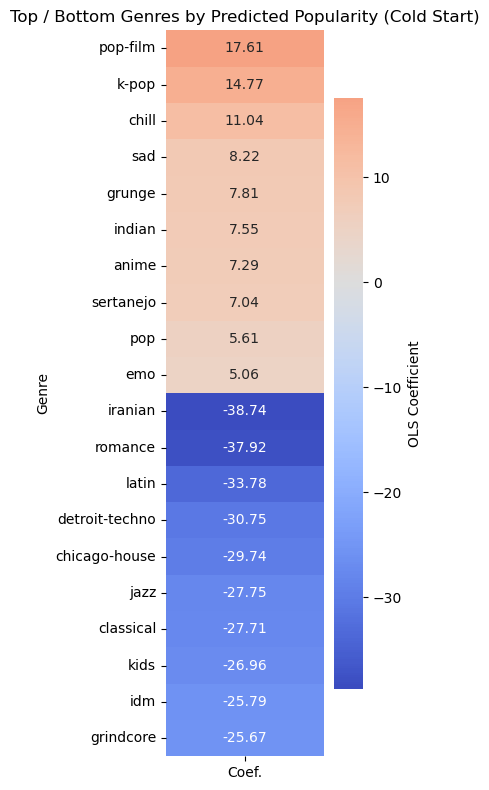

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
sns.heatmap(
    heatmap_df,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'OLS Coefficient'}
)
plt.title('Top / Bottom Genres by Predicted Popularity (Cold Start)')
plt.ylabel('Genre')
plt.xlabel('')
plt.tight_layout()
plt.show()